In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('premier-league-18-19.csv')

In [3]:
df.head(10)

,Rk,Player,Pos,Squad,Age,Min,90s,Gls/90,Ast/90,xA/90,npxG/90,KP,CrsPA,Prog
0,1,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,27,3195,35.5,0.08,0.06,0.10,0.07,31,9,215
1,2,Sergio Agüero\Sergio-Aguero,FW,Manchester City,30,2459,27.3,0.77,0.29,0.19,0.66,33,0,63
2,3,Nathan Aké\Nathan-Ake,DF,Bournemouth,23,3411,37.9,0.11,0.00,0.02,0.09,4,2,69
3,4,Marc Albrighton\Marc-Albrighton,FWMF,Leicester City,28,1625,18.1,0.11,0.11,0.16,0.07,29,15,80
4,5,Toby Alderweireld\Toby-Alderweireld,DF,Tottenham,29,2922,32.5,0.00,0.00,0.02,0.04,7,1,123
5,6,Trent Alexander-Arnold\Trent-Alexander-Arnold,DF,Liverpool,19,2462,27.4,0.04,0.44,0.23,0.05,48,27,191
6,7,Alisson\Alisson,GK,Liverpool,25,3420,38.0,0.00,0.00,0.00,0.00,0,0,0
7,8,Dele Alli\Dele-Alli,MF,Tottenham,22,1825,20.3,0.25,0.15,0.14,0.29,28,3,96
8,9,Miguel Almirón\Miguel-Almiron,FWMF,Newcastle Utd,24,759,8.4,0.00,0.00,0.10,0.19,12,9,19
9,10,Marcos Alonso\Marcos-Alonso,DF,Chelsea,27,2759,30.7,0.07,0.13,0.11,0.09,31,9,133


In [4]:
df['Player'] = df['Player'].str.split('\\', expand=True)[0]

In [5]:
df = df.loc[(df['Pos']=='FW') & (df['90s']>=15)] 

In [6]:
df.shape

(30, 14)

In [7]:
df = df.drop(['Rk', 'Pos', 'Squad', 'Age', 'Min'], axis=1).reset_index()

In [8]:
df.head()

,index,Player,90s,Gls/90,Ast/90,xA/90,npxG/90,KP,CrsPA,Prog
0,1,Sergio Agüero,27.3,0.77,0.29,0.19,0.66,33,0,63
1,16,Marko Arnautović,22.1,0.45,0.18,0.17,0.40,33,2,39
2,20,Pierre-Emerick Aubameyang,30.3,0.73,0.17,0.14,0.53,33,4,66
3,36,Ashley Barnes,26.5,0.45,0.08,0.13,0.38,20,2,39
4,66,Dominic Calvert-Lewin,19.8,0.30,0.10,0.06,0.26,10,1,20


In [9]:
df['KP90'] = df['KP']/df['90s']
df['CrsPA90'] = df['CrsPA']/df['90s']
df['Prog90'] = df['Prog']/df['90s']
df.head()

,index,Player,90s,Gls/90,Ast/90,xA/90,npxG/90,KP,CrsPA,Prog,KP90,CrsPA90,Prog90
0,1,Sergio Agüero,27.3,0.77,0.29,0.19,0.66,33,0,63,1.208791,0.000000,2.307692
1,16,Marko Arnautović,22.1,0.45,0.18,0.17,0.40,33,2,39,1.493213,0.090498,1.764706
2,20,Pierre-Emerick Aubameyang,30.3,0.73,0.17,0.14,0.53,33,4,66,1.089109,0.132013,2.178218
3,36,Ashley Barnes,26.5,0.45,0.08,0.13,0.38,20,2,39,0.754717,0.075472,1.471698
4,66,Dominic Calvert-Lewin,19.8,0.30,0.10,0.06,0.26,10,1,20,0.505051,0.050505,1.010101


In [10]:
df.drop(['KP', 'CrsPA', 'Prog'], axis=1)

,index,Player,90s,Gls/90,Ast/90,xA/90,npxG/90,KP90,CrsPA90,Prog90
0,1,Sergio Agüero,27.3,0.77,0.29,0.19,0.66,1.208791,0.000000,2.307692
1,16,Marko Arnautović,22.1,0.45,0.18,0.17,0.40,1.493213,0.090498,1.764706
2,20,Pierre-Emerick Aubameyang,30.3,0.73,0.17,0.14,0.53,1.089109,0.132013,2.178218
3,36,Ashley Barnes,26.5,0.45,0.08,0.13,0.38,0.754717,0.075472,1.471698
4,66,Dominic Calvert-Lewin,19.8,0.30,0.10,0.06,0.26,0.505051,0.050505,1.010101
5,108,Troy Deeney,28.3,0.32,0.18,0.17,0.34,1.413428,0.106007,3.674912
6,115,Gerard Deulofeu,23.0,0.44,0.22,0.23,0.35,1.347826,0.217391,3.173913
7,176,Andre Gray,15.2,0.46,0.13,0.12,0.38,0.986842,0.065789,0.855263
8,190,Eden Hazard,32.5,0.49,0.46,0.29,0.26,2.830769,0.307692,6.676923
9,213,Danny Ings,18.3,0.38,0.16,0.14,0.37,1.420765,0.109290,2.295082


In [11]:
params = list(df.columns)
print(params)
params = params[2:]

['index', 'Player', '90s', 'Gls/90', 'Ast/90', 'xA/90', 'npxG/90', 'KP', 'CrsPA', 'Prog', 'KP90', 'CrsPA90', 'Prog90']


In [13]:
player = df.loc[df['Player']=='Sadio Mané'].reset_index()
player = list(player.loc[0])
player = player[3:]

In [14]:
player

[34.2,
 0.64,
 0.03,
 0.13,
 0.5,
 44,
 5,
 106,
 1.286549707602339,
 0.14619883040935672,
 3.0994152046783623]

In [15]:
print(len(params), len(player))

11 11


In [16]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
    

In [17]:
values

[90, 93, 6, 33, 93, 83, 75, 86, 56, 66, 70]

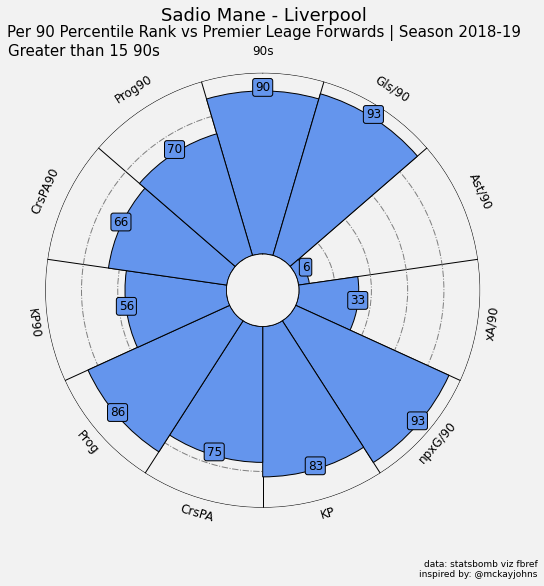

In [19]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of params
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-.",           # linestyle for other circles
    inner_circle_size=20            # increase the circle size
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Sadio Mane - Liverpool", size=18,
    ha="center"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Premier Leage Forwards | Season 2018-19",
    size=15,
    ha="center"
)

fig.text(
    0.203, 0.91,
    "Greater than 15 90s",
    size=15,
    ha="center"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @mckayjohns"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    ha="right"
)

   # these values might differ when you are plotting

plt.show()